
<h2 style="color:rgb(0,120,170)">Document Classification with Standard Machine Learning Methods</h2>

<div style="background-color:rgb(224, 243, 255)">
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.


    
</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-preprocessing"><li style="font-size:large;font-weight:bold">Task A: Pre-processing & Feature Extraction (15 points)</li></a>
    <a href="#section-training"><li style="font-size:large;font-weight:bold">Task B: Training and Results Analysis (15 points)</li></a>
    <a href="#section-optional"><li style="font-size:large;font-weight:bold">Task C: Linear Model Interpretability (2 extra point)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective

The aim of the assignment is to implement a document (sentence) classification model with (standard) machine learning methods. The assignment in total has **30 points**; it also offers **2 extra points** which can cover any missing point.

This Notebook encompasses all aspects of the assignment including the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contain code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way!

Please discuss any unclear point in the assignment in the provided forum available in MOODLE. It is also recommended to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.

</div>


<div style="background-color:rgb(224, 243, 255)">

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python` (>3.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, we use a subset of the `HumSet` dataset [1] (https://blog.thedeep.io/humset/). `HumSet` is created by the DEEP (https://www.thedeep.io) project – an open source platform which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset contains the classes (labels) referring to the humanitarian sectors like agriculture, health, and protection. The dataset contains an overall number of 17,301 data points.

Download the dataset from the Moodle page of the course.

the provided zip file consists of the following files:
- `thedeep.subset.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.labels.txt`: Captions of the labels.
- `thedeep.ToU.txt`: Terms of use of the dataset.

[1] HumSet: Dataset of Multilingual Information Extraction and Classification for Humanitarian Crises Response
*Selim Fekih, Nicolo' Tamagnone, Benjamin Minixhofer, Ranjan Shrestha, Ximena Contla, Ewan Oglethorpe and Navid Rekabsaz.*
In Findings of the 2022 Conference on Empirical Methods in Natural Language Processing (Findings of EMNLP), December 2022.

</div>



<div style="background-color:rgb(224, 243, 255)">

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook.
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<a name="section-preprocessing"></a><h2 style="color:rgb(0,120,170)">Task A: Pre-processing & Feature Extraction (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
**Preprocessing (5 points).** Load the train, validation, and test sets. Study the text and according to your judgements, apply at least <ins>two text cleaning/preprocessing methods</ins>. Punctuations marks, numbers, dates, case-sensitivity are some examples of the elements which can be potentially considered for cleaning/preprocessing. Tokenize the result text with a tokenizer of your choice. Report your approaches to text cleaning and tokenization and the reasons of your choices. Provide some examples, showing the effects of the applied approaches on the text.

**Creating dictionary (5 points).** Create a dictionary of vocabularies following the guidelines discussed in the lecture. Next, reduce the size of dictionary using a method of your choice, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs completely from the texts, or to replace them with a special token like <OOV\>. Explain your approaches and report the statistics of the dictionary before and after the reduction.

**Creating sentence vectors (5 points).** Use the dictionary to prepare <ins>two variations of document representation vectors</ins>, separately for train, validation, and test sets. Both variations follow a Bag-of-Words approach with a different token weighting method. One applied weighting must be `tf-idf` and the other one can be any other method discussed in the lecture such as `tc`, `tf`, `BM25`. These term weighting methods should be implemented; using a library to readily calculate the term weightings is not allowed. Report the applied approaches. Calculate and report the sparsity rate of the vectors of train, validation, and test sets, namely what percentages of the vectors in each set are filled with zeros.

</div>

#### Imports

To manage version conflicts and dependencies for our NLP Assignments, we created a dedicated environment, nlp_env. This isolates dependencies required for spaCy or other packages and ensures compatibility without affecting other projects or the base environment. (concret: spacy==3.0.6 numpy==1.21.6 blis==0.7.8) this adjustments have been necessary to run the packages without Valuerror which we faced at the beginning.

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import spacy
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preprocessing

In [4]:
# Load the Datasets
trainData = pd.read_csv("/content/drive/MyDrive/NLP/thedeep.subset.train.txt", delimiter=",", names=['sentence_id', 'text', 'label'])
valData = pd.read_csv("/content/drive/MyDrive/NLP/thedeep.subset.validation.txt", delimiter=",", names=['sentence_id', 'text', 'label'])
testData = pd.read_csv("/content/drive/MyDrive/NLP/thedeep.subset.test.txt", delimiter=",", names=['sentence_id', 'text', 'label'])

In [5]:
trainData.head()

,sentence_id,text,label
0,5446,In addition to the immediate life-saving inter...,9
1,8812,There are approximately 2.6 million people cla...,3
2,16709,"While aid imports have held up recently, comme...",5
3,3526,Heavy rainfalls as well as onrush of water fro...,0
4,4928,"Based on field reports 9 , the main production...",3


In [6]:
valData.head()

,sentence_id,text,label
0,633,The veterans threw up roadblocks on the main n...,9
1,6001,Water department complains about lack of skill...,11
2,14014,"On 13 February 2018, the Ministry of Health of...",4
3,12225,"In Kakuma and Kalobeyei, both host and refugee...",7
4,10181,'Raqqa is now empty of civilians who had been ...,9


In [7]:
# drop ID sentence
trainData = trainData.drop(['sentence_id'], axis=1)
valData = valData.drop(['sentence_id'], axis=1)
testData = testData.drop(['sentence_id'], axis=1)

In [8]:
# print the new Head of train data to see results
trainData.head()

,text,label
0,In addition to the immediate life-saving inter...,9
1,There are approximately 2.6 million people cla...,3
2,"While aid imports have held up recently, comme...",5
3,Heavy rainfalls as well as onrush of water fro...,0
4,"Based on field reports 9 , the main production...",3


In [9]:
nlp = spacy.load('en_core_web_sm')
stemmer = PorterStemmer()

def pp_text(text):
    #lower casing, removing puncation and numbers
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    #Tokenize and remove stopwords
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop]

    #stemming
    stemTokens = [stemmer.stem(token) for token in tokens]

    return stemTokens

#apply preprocessing
trainData['clean_text'] = trainData['text'].apply(pp_text)
valData['clean_text'] = valData['text'].apply(pp_text)
testData['clean_text'] = testData['text'].apply(pp_text)


In [10]:
print(f'The initial sentence was=', testData['text'][0])
print(f'The cleaned sentence is=', testData['clean_text'][0])

The initial sentence was= Overall 30% decrease in MAM Children admissions from 12,879 in April 2016 to 9,047 in April 2017
The cleaned sentence is= ['overal', ' ', 'decreas', 'mam', 'children', 'admiss', ' ', 'april', ' ', ' ', 'april']


#### Preprocessing Results

To summarize what we did so far in the preprocessing part of Task A.
We used some methods learnd in the lecture to preprocess the Data, like:
1. **Convert to Lowercase**: Text Normalization
2. **Remove Punctuation**: Text Normalization
3. **Remove Stopwords**: Text Normalization
4. **Remove Numbers**: Text Normalization
5. **Stemming**: to reduce words by their stems

---

**Result Example:**

- The initial sentence was:  
  `"Overall 30% decrease in MAM Children admissions from 12,879 in April 2016 to 9,047 in April 2017"`

- The cleaned sentence is:  
  `"overal decreas mam children admiss april april"`
  
it is clearly visible that our Text normalization and as well our stemming went quite well, and we could move on to the next step/task.



## Creating Dictonary

Before we can start with creating the Dictonary, we should first of all remove all the empty spaces and tokens, which we recognised after our tokenization step, in the output of our function.

In [11]:
def clean(tokens):
    return [token for token in tokens if token.strip()]

trainData['clean_text'] = trainData['clean_text'].apply(clean)
valData['clean_text'] = valData['clean_text'].apply(clean)
testData['clean_text'] = testData['clean_text'].apply(clean)

In [12]:
#Now lets see if that worked out
print("Sample cleaned data from trainData:")
print(trainData['clean_text'].head(2))
print("\nSample cleaned data from valData:")
print(valData['clean_text'].head(2))
print("\nSample cleaned data from testData:")
print(testData['clean_text'].head(2))

Sample cleaned data from trainData:
0    [addit, immedi, lifesav, intervent, unicef, ta...
1    [approxim, million, peopl, classifi, phase, mi...
Name: clean_text, dtype: object

Sample cleaned data from valData:
0    [veteran, threw, roadblock, main, northbound, ...
1    [water, depart, complain, lack, skill, worker,...
Name: clean_text, dtype: object

Sample cleaned data from testData:
0    [overal, decreas, mam, children, admiss, april...
1    [fear, ebola, led, attack, health, worker, apr...
Name: clean_text, dtype: object


After observing the above output we can conclude that our cleaning function was successfull & we can now start to move on and create the dictionary of vocabularies following the guidelines we took with us from the lecture

In [13]:
vocab = defaultdict(int)
for tokens in trainData['clean_text']:
    for word in tokens:
        vocab[word] += 1

#Check the initial vocabulary size and display some sample tokens
initial_vocab_size = len(vocab)
print(f"Initial vocabulary size: {initial_vocab_size}")
print("Top 10 most frequent tokens:", sorted(vocab.items(), key=lambda x: x[1], reverse=True)[:10])


Initial vocabulary size: 23270
Top 10 most frequent tokens: [('case', 5594), ('report', 5113), ('food', 4262), ('peopl', 3881), ('area', 3524), ('children', 2953), ('water', 2557), ('health', 2477), ('increas', 2258), ('includ', 2220)]


In [14]:
sample_index = 1
print(f"Sample sentence is: {testData['text'][sample_index]}")
print('-------------------------------------------------------------------------------------------------------------------------------------------')
#print the tokens of the sentence after preprocessing, vocabulary reduction, and OOV handling
print(f"The tokens of the sentence are: {testData['clean_text'][sample_index]}")


Sample sentence is: In 2014, fear of Ebola also led to attacks on health workers. In April 2014, an angry crowd attacked an Ebola treatment center in Macenta, 425 kilometers southeast of Guinea’s capital, Conakry, run by Doctors Without Borders (Medecins Sans Frontieres or MSF), which it accused of bringing Ebola to the city. In August 2014, people in N’Zérékoré, Guinea’s second largest city, protested spraying a market with disinfectant that they believed was infected with the Ebola virus and rioted, injuring over 50 people, including security forces. Law enforcement agencies in Congo should ensure that they can quickly, adequately, and appropriately respond if similar attacks occur.
-------------------------------------------------------------------------------------------------------------------------------------------
The tokens of the sentence are: ['fear', 'ebola', 'led', 'attack', 'health', 'worker', 'april', 'angri', 'crowd', 'attack', 'ebola', 'treatment', 'center', 'macenta',

In [15]:
#frequency threshold to filter tokens
freqThreshold = 1
vocabReduced = {token for token, freq in vocab.items() if freq > freqThreshold}

initial_vocab_size = len(vocab)
reduced_vocab_size = len(vocabReduced)
print(f"Initial vocabulary size: {initial_vocab_size}")
print(f"Reduced vocabulary size after applying frequency threshold: {reduced_vocab_size}")

Initial vocabulary size: 23270
Reduced vocabulary size after applying frequency threshold: 11198


We tested the Threshold parameter a little bit to identify how the the reduced vocab changes with increasing threshold, e.g with alread threshould of 2 instead of one we got the following result:

Initial vocabulary size: 23270
Reduced vocabulary size after applying frequency threshold: 8158

which is also already significanlty less then with threshould 1 therefore we keep the 1, meaning we keep tokens appaearing more then just once.

In [16]:
#function handle OOV by replacing them with OOV
def replace_oov(tokens, vocab):
    return [token if token in vocab else "<OOV>" for token in tokens]

trainData['clean_text'] = trainData['clean_text'].apply(lambda tokens: replace_oov(tokens, vocabReduced))
valData['clean_text'] = valData['clean_text'].apply(lambda tokens: replace_oov(tokens, vocabReduced))
testData['clean_text'] = testData['clean_text'].apply(lambda tokens: replace_oov(tokens, vocabReduced))

sample_index = 1
print(f"Original sentence: {testData['text'][sample_index]}")
print(f"Tokens after preprocessing and OOV handling: {testData['clean_text'][sample_index]}")

Original sentence: In 2014, fear of Ebola also led to attacks on health workers. In April 2014, an angry crowd attacked an Ebola treatment center in Macenta, 425 kilometers southeast of Guinea’s capital, Conakry, run by Doctors Without Borders (Medecins Sans Frontieres or MSF), which it accused of bringing Ebola to the city. In August 2014, people in N’Zérékoré, Guinea’s second largest city, protested spraying a market with disinfectant that they believed was infected with the Ebola virus and rioted, injuring over 50 people, including security forces. Law enforcement agencies in Congo should ensure that they can quickly, adequately, and appropriately respond if similar attacks occur.
Tokens after preprocessing and OOV handling: ['fear', 'ebola', 'led', 'attack', 'health', 'worker', 'april', 'angri', 'crowd', 'attack', 'ebola', 'treatment', 'center', '<OOV>', 'kilomet', 'southeast', 'guinea', 'capit', 'conakri', 'run', 'doctor', 'border', 'medecin', 'san', 'frontier', 'msf', 'accus', 'b

#### Creating Dictionary Results

In this task, we constructed and refined a vocabulary dictionary to prepare it for the next steps, to do so we:

1. **Created an Initial Vocabulary**: We built a vocabulary dictionary by extracting tokens from the cleaned training dataset and calculating their frequencies, resulting in an initial vocabulary size of 23,270 unique tokens.

2. **Reduced the Vocabulary**: To reduce noise, we filtered out low-frequency tokens, keeping only those that appeared more than once in the training dataset. This reduced the vocabulary size to 11,198 tokens, focusing on relevant words for classification

3. **OOV Handling**: We handled tokens not in the reduced vocabulary by replacing them with a special OOV token across all datasets.


Through these steps, we created a refined vocabulary dictionary with the methods from the lecture

## Creating sentence vectors

In [17]:
# Function to calculate TF-IDF weights
def calculate_tfidf(corpus, vocab):
    doc_count = len(corpus)
    tfidf_vectors = []
    idf = {}

    # Compute IDF for each term in vocab
    for token in vocab:
        doc_freq = sum(1 for doc in corpus if token in doc)
        idf[token] = np.log((doc_count + 1) / (doc_freq + 1)) + 1

    # Compute TF-IDF for each document
    for tokens in corpus:
        tfidf_vector = np.zeros(len(vocab))
        term_counts = defaultdict(int)

        # Term frequency
        for token in tokens:
            term_counts[token] += 1

        for idx, token in enumerate(vocab):
            tf = term_counts[token] / len(tokens)
            tfidf_vector[idx] = tf * idf[token] if token in term_counts else 0

        tfidf_vectors.append(tfidf_vector)

    return np.array(tfidf_vectors)

# Generate TF-IDF vectors
tfidf_train = calculate_tfidf(trainData['clean_text'], vocabReduced)
tfidf_val = calculate_tfidf(valData['clean_text'], vocabReduced)
tfidf_test = calculate_tfidf(testData['clean_text'], vocabReduced)


In [18]:
# Function to calculate BM25 weights
def calculate_bm25(corpus, vocab, k=1.5, b=0.75):
    doc_count = len(corpus)
    avg_doc_len = np.mean([len(doc) for doc in corpus])
    bm25_vectors = []
    idf = {}

    # Compute IDF for each term
    for token in vocab:
        doc_freq = sum(1 for doc in corpus if token in doc)
        idf[token] = np.log((doc_count - doc_freq + 0.5) / (doc_freq + 0.5) + 1)

    # Compute BM25 scores
    for tokens in corpus:
        bm25_vector = np.zeros(len(vocab))
        term_counts = defaultdict(int)

        for token in tokens:
            term_counts[token] += 1

        for idx, token in enumerate(vocab):
            tf = term_counts[token]
            doc_len = len(tokens)
            bm25_score = idf[token] * ((tf * (k + 1)) / (tf + k * (1 - b + b * (doc_len / avg_doc_len))))
            bm25_vector[idx] = bm25_score if token in term_counts else 0

        bm25_vectors.append(bm25_vector)

    return np.array(bm25_vectors)

# Generate BM25 vectors
bm25_train = calculate_bm25(trainData['clean_text'], vocabReduced)
bm25_val = calculate_bm25(valData['clean_text'], vocabReduced)
bm25_test = calculate_bm25(testData['clean_text'], vocabReduced)


In [19]:
# Function to calculate sparsity rate
def calculate_sparsity(vectors):
    total_elements = vectors.size
    zero_elements = np.count_nonzero(vectors == 0)
    sparsity_rate = (zero_elements / total_elements) * 100
    return sparsity_rate

# Calculate and print sparsity rates
sparsity_tfidf_train = calculate_sparsity(tfidf_train)
sparsity_tfidf_val = calculate_sparsity(tfidf_val)
sparsity_tfidf_test = calculate_sparsity(tfidf_test)

sparsity_bm25_train = calculate_sparsity(bm25_train)
sparsity_bm25_val = calculate_sparsity(bm25_val)
sparsity_bm25_test = calculate_sparsity(bm25_test)

print(f"Sparsity rate of TF-IDF vectors for train set: {sparsity_tfidf_train:.2f}%")
print(f"Sparsity rate of TF-IDF vectors for validation set: {sparsity_tfidf_val:.2f}%")
print(f"Sparsity rate of TF-IDF vectors for test set: {sparsity_tfidf_test:.2f}%")

print(f"Sparsity rate of BM25 vectors for train set: {sparsity_bm25_train:.2f}%")
print(f"Sparsity rate of BM25 vectors for validation set: {sparsity_bm25_val:.2f}%")
print(f"Sparsity rate of BM25 vectors for test set: {sparsity_bm25_test:.2f}%")


Sparsity rate of TF-IDF vectors for train set: 99.74%
Sparsity rate of TF-IDF vectors for validation set: 99.74%
Sparsity rate of TF-IDF vectors for test set: 99.74%
Sparsity rate of BM25 vectors for train set: 99.74%
Sparsity rate of BM25 vectors for validation set: 99.74%
Sparsity rate of BM25 vectors for test set: 99.74%


# Text Representation and Comparison of TF-IDF and BM25

## 1. TF-IDF (Term Frequency-Inverse Document Frequency)

TF-IDF is a weighting method that considers both the frequency of each term within a document (TF) and the rarity of the term across the entire dataset (IDF).

- **TF**: The term frequency is captured directly in the BoW vector as the count of each term in a document.

- **IDF** is calculated as:

  $$IDF(t) = \log\left(\frac{N}{DF(t) + 1}\right)$$

  where:
  - \(N\) is the total number of documents.
  - $(\text{DF}(t))$ is the document frequency, i.e., the number of documents containing term $(t\)$.
  
  The +1 in the denominator is added to prevent division by zero in cases where a term appears in all documents.

- **TF-IDF vector**: The final TF-IDF vector is calculated by multiplying each term's TF (from the BoW vector) with the corresponding IDF value. This results in a weighted vector where terms that appear in many documents have lower weights, while rare terms have higher weights.

## 2. BM25 (Best Matching 25)

BM25 is an advanced term-weighting scheme that not only considers term frequency (TF) and inverse document frequency (IDF) but also incorporates document length normalization.

- **IDF Calculation**: The BM25 code calculates the IDF for each term as:

 $$
IDF(t) = \log\left(\frac{N}{DF(t) + 1}\right)
$$

  where:
  - N is the total number of documents.
  - DF is the document frequency, as defined above.

  This formulation adds 0.5 to both the numerator and denominator, which is a common BM25 variant to avoid extreme values.

- **Term Weighting in BM25**: The BM25 weight for each term in a document is calculated as:
  $$
  BM25(t, d) = \text{IDF}(t) \cdot \frac{\text{TF}(t, d) \cdot (k + 1)}{\text{TF}(t, d) + k \cdot (1 - b + b \cdot \frac{\text{doc\_len}}{\text{avg\_doc\_len}})}
  $$

  where:
  - $TF(t,d)$ is the term frequency of term \(t\) in document \(d\).
  - $k$ and $b$ are hyperparameters. \(k\) controls the term saturation, typically set to 1.2 or 1.5, while (b) $$with (0 \leq b \leq 1))$$ controls document length normalization (often set to 0.75).
  - $doc\_len$ is the length of the current document, and $avg\_doc\_len$ is the average document length across the corpus.

  This weighting ensures that terms in shorter documents are less penalized, and term frequencies in longer documents don’t excessively dominate.

- **BM25 Vector**: Each document’s BM25 vector is populated with the BM25 scores for each term in the vocabulary.

## 3. Sparsity Calculation

Sparsity is calculated as the percentage of zeros in each vector. High sparsity is expected, as most documents contain only a subset of the vocabulary terms. Both TF-IDF and BM25 vectors can be quite sparse, but the level of sparsity might differ due to the way each method weights terms.

## Key Differences Between TF-IDF and BM25

- **IDF Calculation**: Both use an IDF term, but BM25's IDF has a slight adjustment with 0.5 to avoid extremes.
  
- **Length Normalization**: TF-IDF does not normalize based on document length, while BM25 incorporates a length normalization term, which helps mitigate the effect of document length on term weights.
  
- **Hyperparameters**: BM25 includes the \(k\) and \(b\) parameters, which provide flexibility in controlling term frequency saturation and length normalization.

Both TF-IDF and BM25 aim to represent documents in a way that captures term importance, but BM25 is often better suited for ranking tasks because of its nuanced handling of term frequency and document length.


<a name="section-training"></a><h2 style="color:rgb(0,120,170)">Task B: Training and Results Analysis (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

To evaluate the models, use <ins>accuracy</ins> as the metric.

**Dummy baseline (2 points).** Create one dummy baseline classifier that predicts the validation/test labels only based on the distribution of the labels in the training set (without any use of the feature vectors). This is a weak baseline and acts as a sanity check for the actual classifiers.

**Training and tuning classifiers (5 points).** Select at least <ins>two classification algorithms</ins> from standard machine learning classifiers. Using each classification algorithm, train a machine learning model on each of the variations of feature vectors. This should result in <ins>four experiment sets</ins> (2 variations of feature vectors × 2 classification algorithms). The ML model in each of the experiments possibly have several involving hyper-parameters. For each experiment, select <ins>one of the hyper-parameters and tune its value</ins>. The tuning process is done by first assigning at least <ins>three values</ins> to the hyper-parameter, then training separate models based on each value, and finally using the evaluation results on the validation set to select the best-performing model. Report the studied hyper-parameters, the evaluation results of each on validation set, and finally the selected value of the hyper-parameter.

**Evaluation, reporting results, and discussion (3 point).** Evaluate the selected models of the four experiments on the test set. Report the results of <ins>the four experiments on both validation and test sets (side by side) in one table as well as in one plot</ins>. Compare different experiments and models. Are the test results lower(/higher) than the validation results? If it is the case, where can it be rooted from? Among all these models and variations, what are the most important factors improving the classification results?

**Confusion matrix (2 point).** Select the best performing model among the experiments and use it to create a confusion matrix. The matrix shows the predicted versus true results per each label. Explain your observations on the matrix. Across which classes do you observe significant confusions?

**Features visualization (3 point).** Continue with the best performing model and now take its feature vectors for the *dataitems in the test set*. Project these feature vectors to a 2-dimensional space using the TSNE method.  Using these 2-dimensional vectors, create two plots where the dataitems are shown as points (small circles) on the plots. The plots look exactly the same but only differ in the coloring of the data points. The first plot colors every dataitem with its *true label*, while the second one colors each according to its *predicted label by the model*. Keep in mind to assign the same colors to the classes of the plots, so that the plots are visually comparable. Put these two plots side by side, observe the differences, and compare the results. Report your observations.


</div>

# Dummy Baseline


In [20]:
def dummy_baseline_classifier(train_labels, eval_labels):
    """
    Create a dummy baseline classifier that predicts labels
    based on the distribution in the training set.

    Args:
    - train_labels: Labels from the training set
    - eval_labels: Labels to predict for validation/test set

    Returns:
    - Predicted labels
    - Accuracy of the dummy classifier
    """
    # Count label frequencies in the training set
    unique_labels, label_counts = np.unique(train_labels, return_counts=True)
    label_probabilities = label_counts / len(train_labels)

    # Create a probability distribution for predicting labels
    label_dist = dict(zip(unique_labels, label_probabilities))

    # Predict labels by sampling from the training distribution
    np.random.seed(42)  # for reproducibility
    predicted_labels = np.random.choice(unique_labels, size=len(eval_labels), p=label_probabilities)

    # Calculate accuracy
    accuracy = np.mean(predicted_labels == eval_labels)

    return predicted_labels, accuracy, label_dist

# Dummy baseline for validation set
val_predictions, val_accuracy, label_dist = dummy_baseline_classifier(
    train_labels=trainData['label'],
    eval_labels=valData['label']
)

# Dummy baseline for test set
test_predictions, test_accuracy, _ = dummy_baseline_classifier(
    train_labels=trainData['label'],
    eval_labels=testData['label']
)

# Print results
print("Dummy Baseline Label Distribution:")
for label, prob in label_dist.items():
    print(f"Label {label}: {prob*100:.2f}%")

print("\nValidation Set Results:")
print(f"Dummy Baseline Accuracy: {val_accuracy*100:.2f}%")

print("\nTest Set Results:")
print(f"Dummy Baseline Accuracy: {test_accuracy*100:.2f}%")

Dummy Baseline Label Distribution:
Label 0: 1.97%
Label 1: 4.13%
Label 2: 4.97%
Label 3: 17.17%
Label 4: 23.36%
Label 5: 4.62%
Label 6: 1.28%
Label 7: 1.87%
Label 8: 4.66%
Label 9: 21.94%
Label 10: 7.82%
Label 11: 6.23%

Validation Set Results:
Dummy Baseline Accuracy: 14.83%

Test Set Results:
Dummy Baseline Accuracy: 15.11%


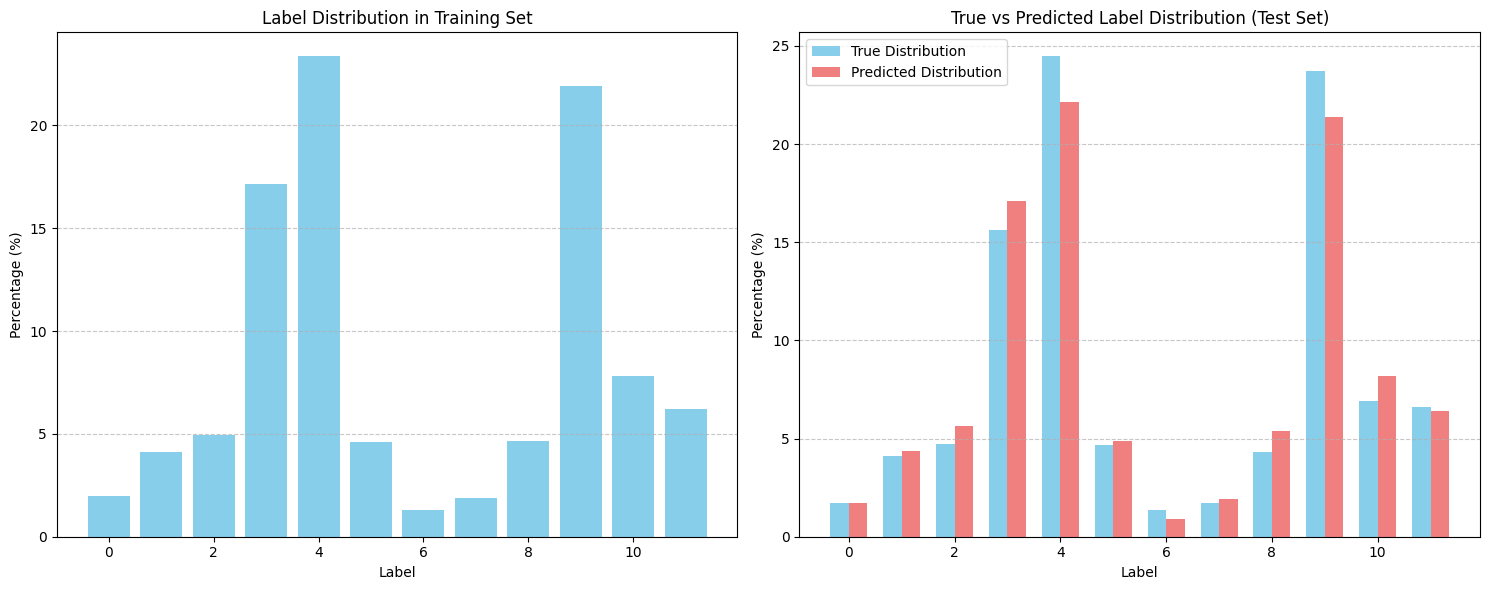


Label Distribution Summary:

Label | Training % | True Test % | Predicted Test %
--------------------------------------------------
    0 |      1.97 |      1.73 |          1.70
    1 |      4.13 |      4.12 |          4.35
    2 |      4.97 |      4.74 |          5.66
    3 |     17.17 |     15.61 |         17.11
    4 |     23.36 |     24.47 |         22.12
    5 |      4.62 |      4.66 |          4.86
    6 |      1.28 |      1.35 |          0.92
    7 |      1.87 |      1.73 |          1.93
    8 |      4.66 |      4.32 |          5.39
    9 |     21.94 |     23.70 |         21.39
   10 |      7.82 |      6.94 |          8.17
   11 |      6.23 |      6.63 |          6.40


In [21]:
# Create figure with subplots
plt.figure(figsize=(15, 6))

# Convert label distribution to percentage
label_dist_percentage = {k: v*100 for k, v in label_dist.items()}

# Plot 1: Label Distribution in Training Set
plt.subplot(1, 2, 1)
plt.bar(label_dist_percentage.keys(), label_dist_percentage.values(), color='skyblue')
plt.title('Label Distribution in Training Set')
plt.xlabel('Label')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Comparing True vs Predicted Labels in Test Set
plt.subplot(1, 2, 2)
true_label_dist = np.bincount(testData['label']) / len(testData['label']) * 100
pred_label_dist = np.bincount(test_predictions) / len(test_predictions) * 100

x = np.arange(len(true_label_dist))
width = 0.35

plt.bar(x - width/2, true_label_dist, width, label='True Distribution', color='skyblue')
plt.bar(x + width/2, pred_label_dist, width, label='Predicted Distribution', color='lightcoral')

plt.xlabel('Label')
plt.ylabel('Percentage (%)')
plt.title('True vs Predicted Label Distribution (Test Set)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nLabel Distribution Summary:")
print("\nLabel | Training % | True Test % | Predicted Test %")
print("-" * 50)
for label in range(len(true_label_dist)):
    print(f"{label:5d} | {label_dist_percentage[label]:9.2f} | {true_label_dist[label]:9.2f} | {pred_label_dist[label]:13.2f}")

## Explanation

### 1. Label Distribution Analysis
* The classifier first analyzes the training data to understand how frequently each label appears
* Labels range from 0 to 11 (12 different classes)
* Label distribution breakdown:
  * Label 4: 23.36% (most common)
  * Label 9: 21.94% (second most common)
  * Label 6: 1.28% (least common)
  * Labels 0 and 7: 1.97% and 1.87% respectively (relatively rare)

### 2. Prediction Mechanism
* For each sample in validation/test set, the classifier randomly predicts a label
* Prediction probabilities match training set label frequencies
  * Example: 23.36% chance of predicting label 4 for any sample

### 3. Performance Measurement
* **Validation accuracy:** 14.83%
* **Test accuracy:** 15.11%

## Results Analysis

### 1. Low Accuracy
* Both validation and test accuracies ~15%
* Expected performance for dummy classifier
* Random guessing baseline (1/12) would be ~8.33%
* Improved performance (15%) due to considering label distribution

### 2. Consistency
* Validation accuracy: 14.83%
* Test accuracy: 15.11%
* Difference: 0.28%
* Similar accuracies indicate:
  * Consistent label distributions across datasets
  * Effective dataset splitting

### 3. Baseline Context
* 15% accuracy serves as minimum performance threshold
* Real classifiers should perform significantly better
* Performance below 15% indicates serious issues

This baseline analysis helps us:
* ✓ Verify evaluation pipeline functionality
* ✓ Establish minimum performance expectations
* ✓ Identify random chance classification level
* ✓ Ensure future models learn meaningful patterns


## Naive Baye sand Logistic Regression

Training models with TF-IDF vectors...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Training models with BM25 vectors...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Validation Results:

Naive Bayes - TF-IDF:
Alpha = 0.1: Accuracy = 0.7766
Alpha = 0.5: Accuracy = 0.7296
Alpha = 1.0: Accuracy = 0.6888

Naive Bayes - BM25:
Alpha = 0.1: Accuracy = 0.7334
Alpha = 0.5: Accuracy = 0.7461
Alpha = 1.0: Accuracy = 0.7473

Logistic Regression - TF-IDF:
C = 0.1: Accuracy = 0.7296
C = 1.0: Accuracy = 0.8151
C = 10.0: Accuracy = 0.8055

Logistic Regression - BM25:
C = 0.1: Accuracy = 0.7962
C = 1.0: Accuracy = 0.7827
C = 10.0: Accuracy = 0.7816

Test Set Results:
Naive Bayes (TF-IDF) - Test Accuracy: 0.7649
Naive Bayes (BM25) - Test Accuracy: 0.7503
Logistic Regression (TF-IDF) - Test Accuracy: 0.8039
Logistic Regression (BM25) - Test Accuracy: 0.7931


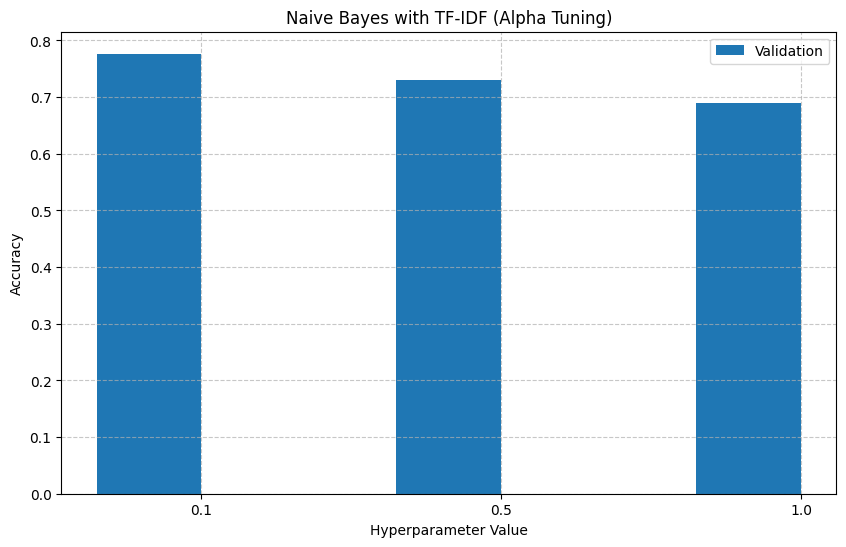

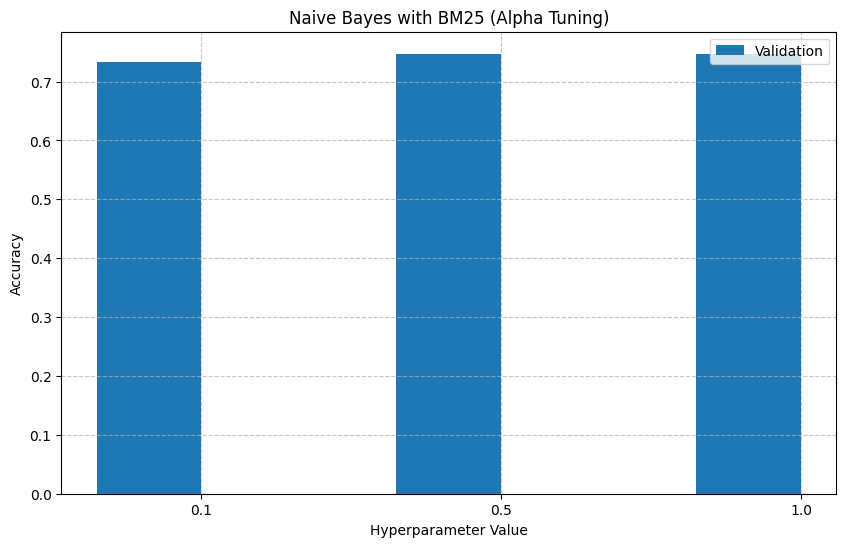

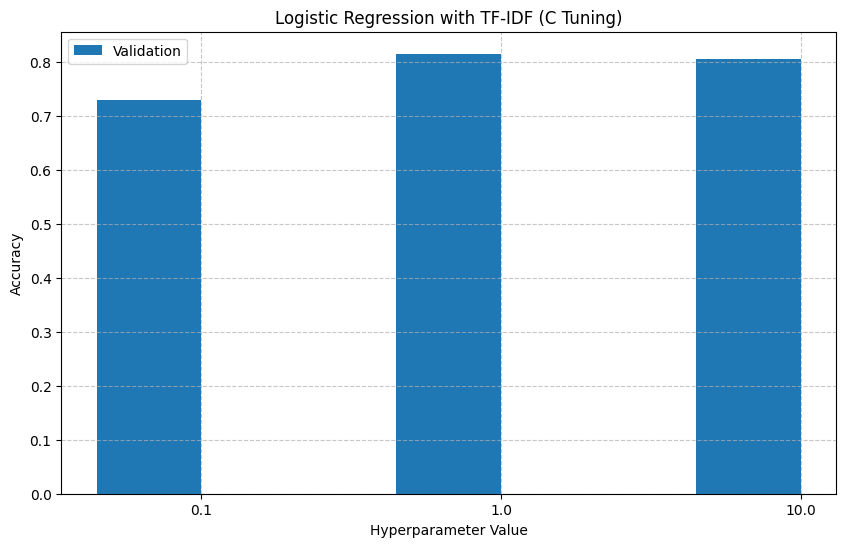

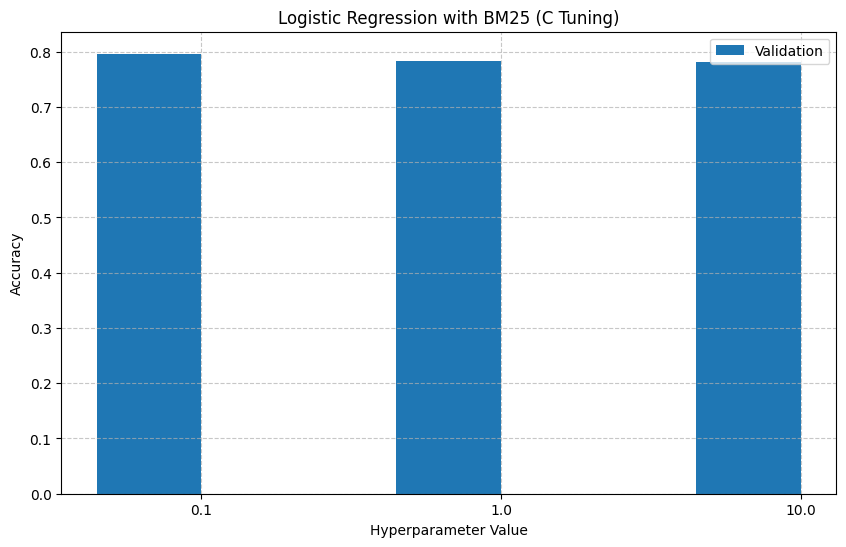

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

def train_and_evaluate_nb(train_vectors, train_labels, val_vectors, val_labels, alpha_values):
    """Train and evaluate Multinomial Naive Bayes with different alpha values"""
    results = {}
    for alpha in alpha_values:
        # Initialize and train model
        nb_model = MultinomialNB(alpha=alpha)
        nb_model.fit(train_vectors, train_labels)

        # Evaluate on validation set
        val_pred = nb_model.predict(val_vectors)
        accuracy = accuracy_score(val_labels, val_pred)
        results[alpha] = {
            'accuracy': accuracy,
            'model': nb_model
        }

    # Find best alpha
    best_alpha = max(results.items(), key=lambda x: x[1]['accuracy'])
    return results, best_alpha[0], best_alpha[1]['model']

def train_and_evaluate_lr(train_vectors, train_labels, val_vectors, val_labels, c_values):
    """Train and evaluate Logistic Regression with different C values"""
    results = {}
    for c in c_values:
        # Initialize and train model
        lr_model = LogisticRegression(C=c, max_iter=1000, multi_class='multinomial')
        lr_model.fit(train_vectors, train_labels)

        # Evaluate on validation set
        val_pred = lr_model.predict(val_vectors)
        accuracy = accuracy_score(val_labels, val_pred)
        results[c] = {
            'accuracy': accuracy,
            'model': lr_model
        }

    # Find best C value
    best_c = max(results.items(), key=lambda x: x[1]['accuracy'])
    return results, best_c[0], best_c[1]['model']

# Hyperparameter values to test
alpha_values = [0.1, 0.5, 1.0]  # for Naive Bayes
c_values = [0.1, 1.0, 10.0]     # for Logistic Regression

# Train and evaluate models with TF-IDF vectors
print("Training models with TF-IDF vectors...")

# Naive Bayes with TF-IDF
nb_tfidf_results, best_alpha_tfidf, best_nb_tfidf = train_and_evaluate_nb(
    tfidf_train, trainData['label'],
    tfidf_val, valData['label'],
    alpha_values
)

# Logistic Regression with TF-IDF
lr_tfidf_results, best_c_tfidf, best_lr_tfidf = train_and_evaluate_lr(
    tfidf_train, trainData['label'],
    tfidf_val, valData['label'],
    c_values
)

# Train and evaluate models with BM25 vectors
print("\nTraining models with BM25 vectors...")

# Naive Bayes with BM25
nb_bm25_results, best_alpha_bm25, best_nb_bm25 = train_and_evaluate_nb(
    bm25_train, trainData['label'],
    bm25_val, valData['label'],
    alpha_values
)

# Logistic Regression with BM25
lr_bm25_results, best_c_bm25, best_lr_bm25 = train_and_evaluate_lr(
    bm25_train, trainData['label'],
    bm25_val, valData['label'],
    c_values
)

# Print validation results for all hyperparameter values
print("\nValidation Results:")
print("\nNaive Bayes - TF-IDF:")
for alpha, result in nb_tfidf_results.items():
    print(f"Alpha = {alpha}: Accuracy = {result['accuracy']:.4f}")

print("\nNaive Bayes - BM25:")
for alpha, result in nb_bm25_results.items():
    print(f"Alpha = {alpha}: Accuracy = {result['accuracy']:.4f}")

print("\nLogistic Regression - TF-IDF:")
for c, result in lr_tfidf_results.items():
    print(f"C = {c}: Accuracy = {result['accuracy']:.4f}")

print("\nLogistic Regression - BM25:")
for c, result in lr_bm25_results.items():
    print(f"C = {c}: Accuracy = {result['accuracy']:.4f}")

# Evaluate best models on test set
print("\nTest Set Results:")
# Best NB TF-IDF
test_pred = best_nb_tfidf.predict(tfidf_test)
print(f"Naive Bayes (TF-IDF) - Test Accuracy: {accuracy_score(testData['label'], test_pred):.4f}")

# Best NB BM25
test_pred = best_nb_bm25.predict(bm25_test)
print(f"Naive Bayes (BM25) - Test Accuracy: {accuracy_score(testData['label'], test_pred):.4f}")

# Best LR TF-IDF
test_pred = best_lr_tfidf.predict(tfidf_test)
print(f"Logistic Regression (TF-IDF) - Test Accuracy: {accuracy_score(testData['label'], test_pred):.4f}")

# Best LR BM25
test_pred = best_lr_bm25.predict(bm25_test)
print(f"Logistic Regression (BM25) - Test Accuracy: {accuracy_score(testData['label'], test_pred):.4f}")

# Create visualization of results
def plot_results(results_dict, title):
    plt.figure(figsize=(10, 6))
    x = np.arange(len(results_dict))
    width = 0.35

    plt.bar(x - width/2, [v['accuracy'] for v in results_dict.values()], width, label='Validation')
    plt.xlabel('Hyperparameter Value')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.xticks(x, [str(k) for k in results_dict.keys()])
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Plot results for each model
plot_results(nb_tfidf_results, 'Naive Bayes with TF-IDF (Alpha Tuning)')
plot_results(nb_bm25_results, 'Naive Bayes with BM25 (Alpha Tuning)')
plot_results(lr_tfidf_results, 'Logistic Regression with TF-IDF (C Tuning)')
plot_results(lr_bm25_results, 'Logistic Regression with BM25 (C Tuning)')


 ## Explanation



* **Models:** Multinomial Naive Bayes and Logistic Regression are trained and evaluated.
* **Hyperparameter Tuning:** Different alpha values for Naive Bayes and different C values for Logistic Regression are tested to find the best performing configuration.
* **Vectorization:** Both TF-IDF and BM25 techniques are used to convert text data into numerical features.
* **Evaluation:** Accuracy score is used to measure model performance on validation and test sets.
* **Visualization:** Plots are created to visualize the effect of hyperparameter tuning on validation accuracy.


### Results:

* **Validation Set:** Logistic Regression with TF-IDF achieved the highest validation accuracy (0.8151), followed by Logistic Regression with BM25 (0.7962). Naive Bayes performed better with BM25 (highest accuracy of 0.7473) compared to TF-IDF (highest accuracy of 0.7766).
* **Test Set:** Logistic Regression with TF-IDF again achieved the best performance (accuracy of 0.8039), followed by Logistic Regression with BM25 (accuracy of 0.7931). Naive Bayes models showed lower test set accuracy compared to Logistic Regression.  

Logistic Regression with TF-IDF vectorization appears to be the best performing model in this scenario. However, the choice of the best model and vectorization technique may depend on the specific dataset and task.



## Confusion Matrix and Dimensionality Reduction

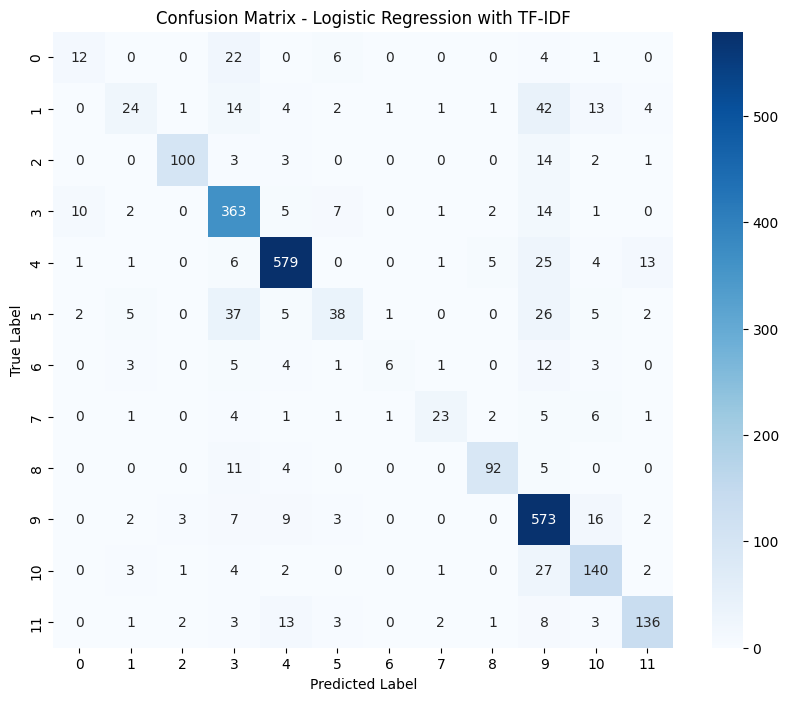

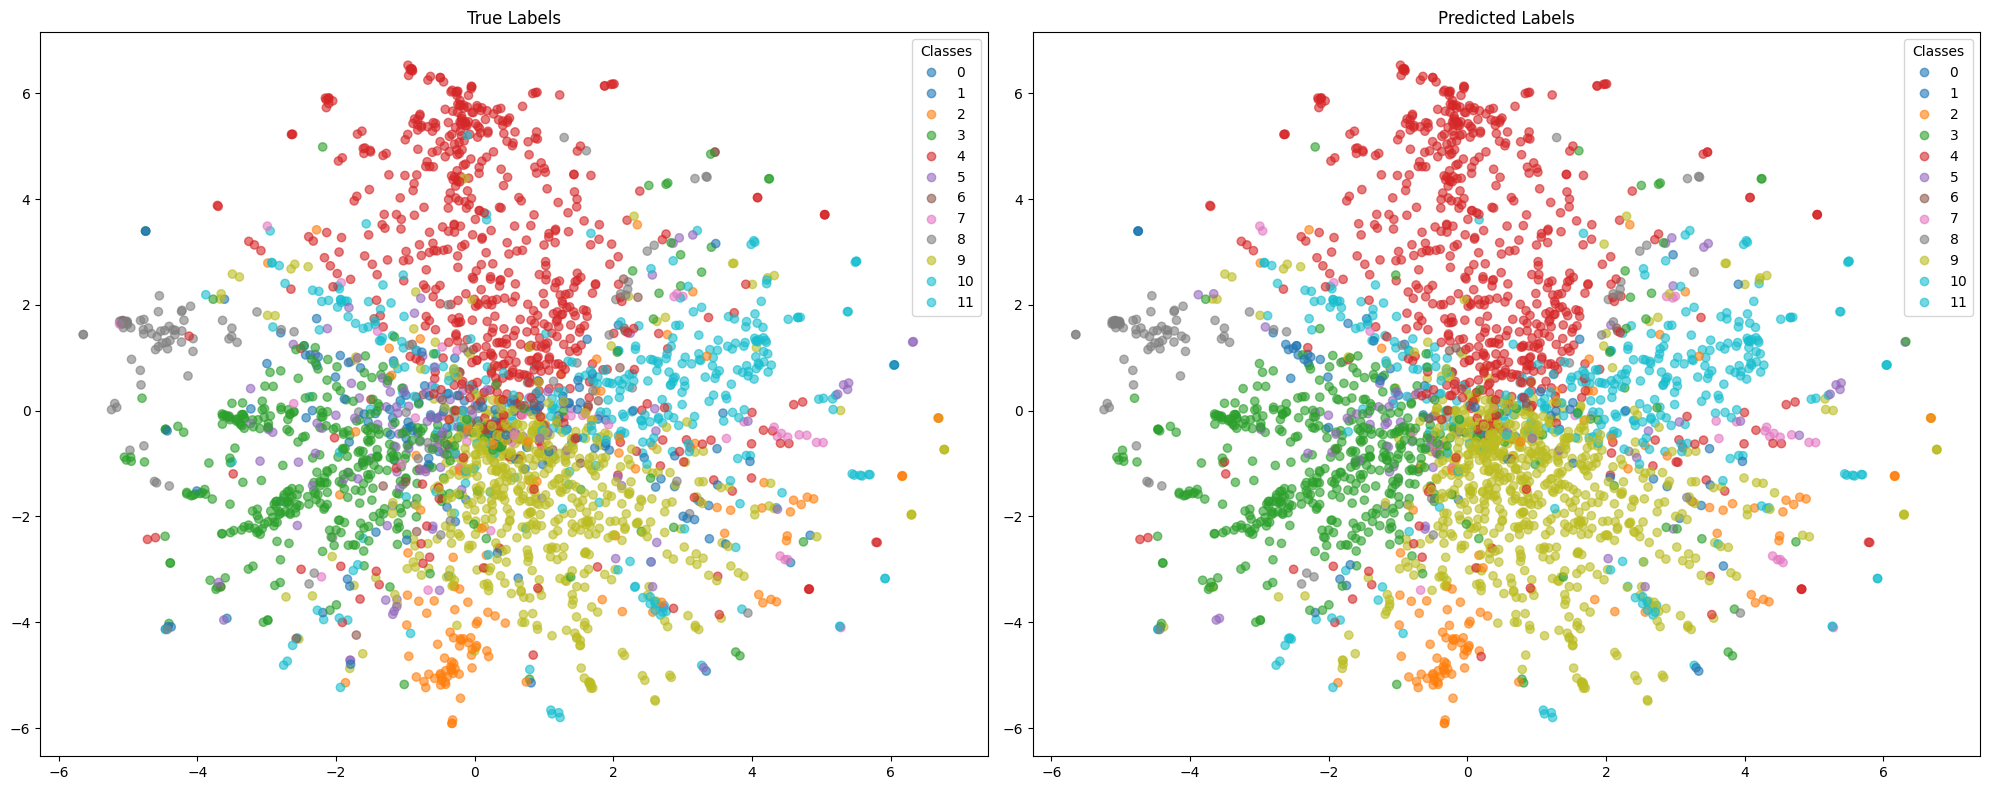

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create confusion matrix
y_pred = best_lr_tfidf.predict(tfidf_test)
cm = confusion_matrix(testData['label'], y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression with TF-IDF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# TSNE visualization
# Reduce dimensionality of TF-IDF features
tsne = TSNE(n_components=2, random_state=42)
tsne_vectors = tsne.fit_transform(tfidf_test)  # Removed .toarray()

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: True Labels
scatter1 = ax1.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1],
                      c=testData['label'], cmap='tab10', alpha=0.6)
ax1.set_title('True Labels')
ax1.legend(*scatter1.legend_elements(), title="Classes")

# Plot 2: Predicted Labels
scatter2 = ax2.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1],
                      c=y_pred, cmap='tab10', alpha=0.6)
ax2.set_title('Predicted Labels')
ax2.legend(*scatter2.legend_elements(), title="Classes")

plt.tight_layout()
plt.show()

#Explanation and Observations
In the confusion matrix:
- Rows represent the **true labels** of the test set.
- Columns represent the **predicted labels** made by the model.
- The diagonal cells show the number of correct predictions (where the predicted label matches the true label).
- Off-diagonal cells show **misclassifications**, where the model predicted the wrong label.


### 1. Strong Diagonal Performance
* Classes 3, 4, and 9 show particularly strong performance with:
    * Class 3: 363 correct predictions
    * Class 4: 579 correct predictions
    * Class 9: 573 correct predictions
* These diagonal elements represent where the model correctly predicted the true label

### 2. Notable Confusions
* Class 1 → Class 9: 42 instances of misclassification
* Class 5 → Class 3: 37 instances of misclassification
* Class 10 → Class 9: 27 instances of misclassification
* Multiple classes show confusion with Class 9, suggesting overlapping features

### 3. Class-specific Issues
* Class 6: Poor performance (only 6 correct predictions)
* Class 7: Low accuracy (23 correct predictions)
* Class 0: Moderate performance but confused with Class 3 (22 instances)

## TSNE Visualization Observations

### 1. Cluster Formation
* Data forms distinct clusters in 2D space
* Red cluster (likely Class 4) shows clear separation
* Center of plot exhibits significant class overlap

### 2. True vs Predicted Labels Comparison
* Overall cluster structure maintains consistency between true and predicted labels
* Most misclassifications occur in dense central region
* Outer clusters show higher prediction accuracy

### 3. Spatial Distribution
* Peripheral clusters: Tight and well-defined
* Central regions: More diffused and intermixed
* Clear radial pattern with arc-like structures for some classes

### 4. Model Performance Insights
* Best performance: Classes with distinct, separated clusters
* Challenge areas: Regions with class overlap
* Visualization confirms confusion matrix findings:
    * High confusion areas in matrix correspond to spatially close clusters in TSNE
    * Well-separated clusters show lower confusion rates

<a name="section-optional"></a><h2 style="color:rgb(0,120,170)">Task C: Linear Model Interpretability (2 extra points)</h2>

<div style="background-color:rgb(224, 243, 255)">
Train a logistic regression model on one of the document representations. Take the coefficient weights, learned by the model, on each dimension (which here corresponds to each token in the dictionary). Separately for each class, study what are the tokens that have the highest contributions/importance for the predictions of the model.
</div>

In [64]:
vocabReduced = {token for token, freq in vocab.items() if freq > freqThreshold}
# Step 1: Train Logistic Regression model
clf_log_reg = LogisticRegression(C=10, max_iter=1000, multi_class='multinomial', solver='lbfgs')
clf_log_reg.fit(tfidf_train, trainData['label'])

# Step 2: Get the learned coefficients (weights) for each class
coefficients = clf_log_reg.coef_  # Shape: (n_classes, n_features)

# Get the feature (token) names from the TF-IDF vectorizer vocabulary
tokens = list(vocabReduced)

# Step 3: For each class, find the top contributing tokens (positive and negative weights)
top_n = 10  # Let's take the top 10 most important tokens per class

# Create a DataFrame to store the most important tokens for each class
important_tokens_per_class = {}

for class_index in range(coefficients.shape[0]):  # For each class
    class_coefficients = coefficients[class_index]  # Get coefficients for this class
    top_positive_indices = np.argsort(class_coefficients)[-top_n:]  # Top N highest coefficients (positive)
    top_negative_indices = np.argsort(class_coefficients)[:top_n]  # Top N lowest coefficients (negative)

    # Get the corresponding tokens for these indices
    top_positive_tokens = [tokens[i] for i in top_positive_indices]
    top_negative_tokens = [tokens[i] for i in top_negative_indices]

    # Store results in a dictionary
    important_tokens_per_class[f"Class {class_index}"] = {
        'Top Positive Tokens': top_positive_tokens,
        'Top Negative Tokens': top_negative_tokens
    }

# Convert the results into a more readable format (DataFrame) for display
important_tokens_df = pd.DataFrame(important_tokens_per_class)

# Display the most important tokens for each class (positive and negative contributions)
important_tokens_df


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9,Class 10,Class 11
Top Positive Tokens,"[embank, ethiopia, livestock, fall, hectar, fa...","[unpreced, market, heatstrok, ukhiya, item, st...","[schoolag, close, univers, student, attend, ch...","[insecur, wfp, price, crop, famin, phase, flou...","[medicin, dengu, hospit, healthcar, malaria, o...","[econom, anim, farmer, employ, goat, incom, ca...","[infrastructur, airport, staff, incid, transpo...","[time, price, blanket, diesel, item, ga, nfi, ...","[admiss, critic, children, milk, preval, gam, ...","[secur, detain, journalist, landmin, legal, tr...","[live, overcrowd, landslid, structur, settleme...","[pump, wastewat, drought, drink, typhoid, sani..."
Top Negative Tokens,"[limit, reach, peopl, children, river, heavi, ...","[grant, kenya, safe, suffer, harvest, somalia,...","[water, avoid, inclus, protect, kumasi, involv...","[health, precrisi, build, unhcr, shelter, midm...","[food, educ, cdc, household, bidibidi, hous, t...","[signific, rohingya, children, stand, aid, sec...","[health, famili, displac, camp, school, situat...","[displac, risk, food, monday, children, kunen,...","[treat, municip, govern, sadli, old, shelter, ...","[food, malnutrit, water, disrupt, destroy, dis...","[food, apart, health, servic, children, lima, ...","[open, food, children, malnutrit, aid, ethiopi..."
